In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Attribute Information:

### Output features

1. price - price in US dollars (\$326--\$18,823) - 

### Input featrues

2. carat - weight of the diamond (0.2--5.01)

3. cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)

4. color - diamond colour, from J (worst) to D (best)

5. clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

6. x - length in mm (0--10.74)

7. y -  width in mm (0--58.9)

8. z - depth in mm (0--31.8)

- depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- table width of top of diamond relative to widest point (43--95)

In [2]:
diamond = pd.read_csv("diamonds.csv")
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamond=diamond.drop(columns=["Unnamed: 0"])
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
# To check rows and columns in the dataset
diamond.shape

(53940, 10)

In [5]:
# Data Exploration
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
## descriptive summary of the dataset
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
## List down all the columns names
diamond.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
 # find irregular extension and replace it with null
diamond = diamond.replace(r'[-+&!@#$%^&*/(),.?":{}|<>]', np.nan, regex=True)   

In [9]:
## Missing values in the dataset

diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
## duplicates values in the dataset
diamond.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool

In [11]:
# remove blank raws in the dataset
diamond.dropna(inplace=True)  

In [12]:
diamond.shape

(53940, 10)

In [13]:
diamond.rename(columns={'x': 'length_mm','y': 'width_mm','z': 'depth_mm'}, inplace=True)
diamond.head()

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
diamond.describe()

,carat,depth,table,price,length_mm,width_mm,depth_mm
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Insights

- Missing values can introduce bias and lead to inaccurate conclusions if not addressed properly. Data cleansing techniques like imputation (filling in missing values with estimated values) or deletion (removing rows or columns with too many missing values) can help mitigate the impact of missing data

- Here, in length_mm, width_mm, and depth_mm minimum values are '0' which is not practically possible. To drop that value we use

In [15]:
# Step 1: Remove rows where length_mm, width_mm, and depth_mm is '0'.
diamond = diamond.drop(diamond[diamond['length_mm'] == 0].index)
diamond = diamond.drop(diamond[diamond['width_mm'] == 0].index)
diamond = diamond.drop(diamond[diamond['depth_mm'] == 0].index)

diamond.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53920.0,0.797698,0.473795,0.20,0.40,0.70,1.04,5.01
depth,53920.0,61.749514,1.432331,43.00,61.00,61.80,62.50,79.00
table,53920.0,57.456834,2.234064,43.00,56.00,57.00,59.00,95.00
price,53920.0,3930.993231,3987.280446,326.00,949.00,2401.00,5323.25,18823.00
length_mm,53920.0,5.731627,1.119423,3.73,4.71,5.70,6.54,10.74
width_mm,53920.0,5.734887,1.140126,3.68,4.72,5.71,6.54,58.90
depth_mm,53920.0,3.540046,0.702530,1.07,2.91,3.53,4.04,31.80


## Observation of the fearures and their Measures of Central Tendency: mean, median, and others, explain

-  Carat Weight: The carat weight distribution is right-skewed, with a mean (0.8) higher than the median (0.7), indicating the presence of some larger diamonds. The IQR (1.04 - 0.40 = 0.64) suggests a relatively narrow spread in carat weights for the middle 50% of the data.


-  Dimensions (length_mm, width_mm, depth_mm): The dimensions have similar distributions, with means around 5.7 and medians around 5.7, indicating a relatively symmetric distribution. The IQRs (e.g., length_mm: 6.54 - 4.71 = 1.83) suggest modrate variability in diamond dimensions.


-  Depth and Table: The depth and table percentages have narrower distributions, with smaller standard deviations and IQRs, suggesting less variability in these cut-related measures.


- Price: The price distribution is heavily right-skewed, with a mean (3,933) much higher than the median (2,401), indicating the presence of some extremely expensive diamonds. The IQR (5,324 - 950 = 4,374) suggests a wide range of prices in the dataset.

In [16]:
diamond_copy = diamond.copy()

In [17]:
diamond_copy

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [18]:
numeric_features = [feature for feature in diamond_copy.columns if diamond_copy[feature].dtype != 'O']
categorical_features = [feature for feature in diamond_copy.columns if diamond_copy[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['carat', 'depth', 'table', 'price', 'length_mm', 'width_mm', 'depth_mm']

We have 3 categorical features : ['cut', 'color', 'clarity']


In [19]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(diamond_copy[col].value_counts(normalize=True)*100)
    print('---------------------------')

Ideal        39.962908
Premium      25.556380
Very Good    22.405415
Good          9.091246
Fair          2.984050
Name: cut, dtype: float64
---------------------------
G    20.927300
E    18.169510
F    17.689169
H    15.389466
D    12.563056
I    10.053783
J     5.207715
Name: color, dtype: float64
---------------------------
SI1     24.226632
VS2     22.726261
SI2     17.034496
VS1     15.152077
VVS2     9.395401
VVS1     6.776706
IF       3.319733
I1       1.368694
Name: clarity, dtype: float64
---------------------------


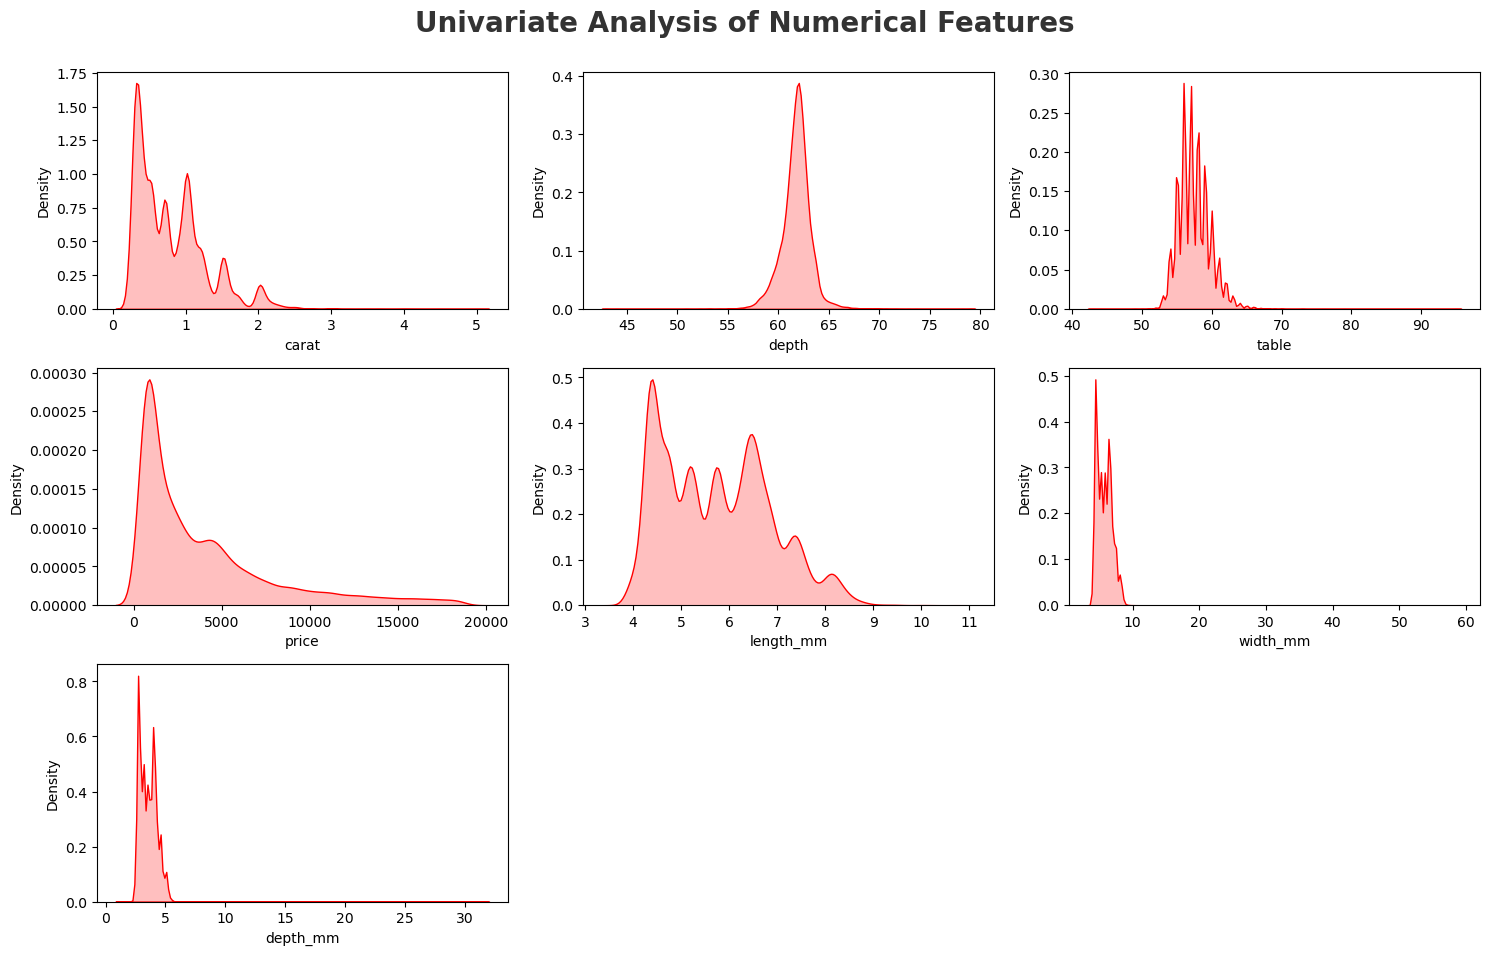

In [20]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=diamond_copy[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Observations
- Carat, price, and depth are left skewed while total depth percentage is normally distributed, and others are also looks normal

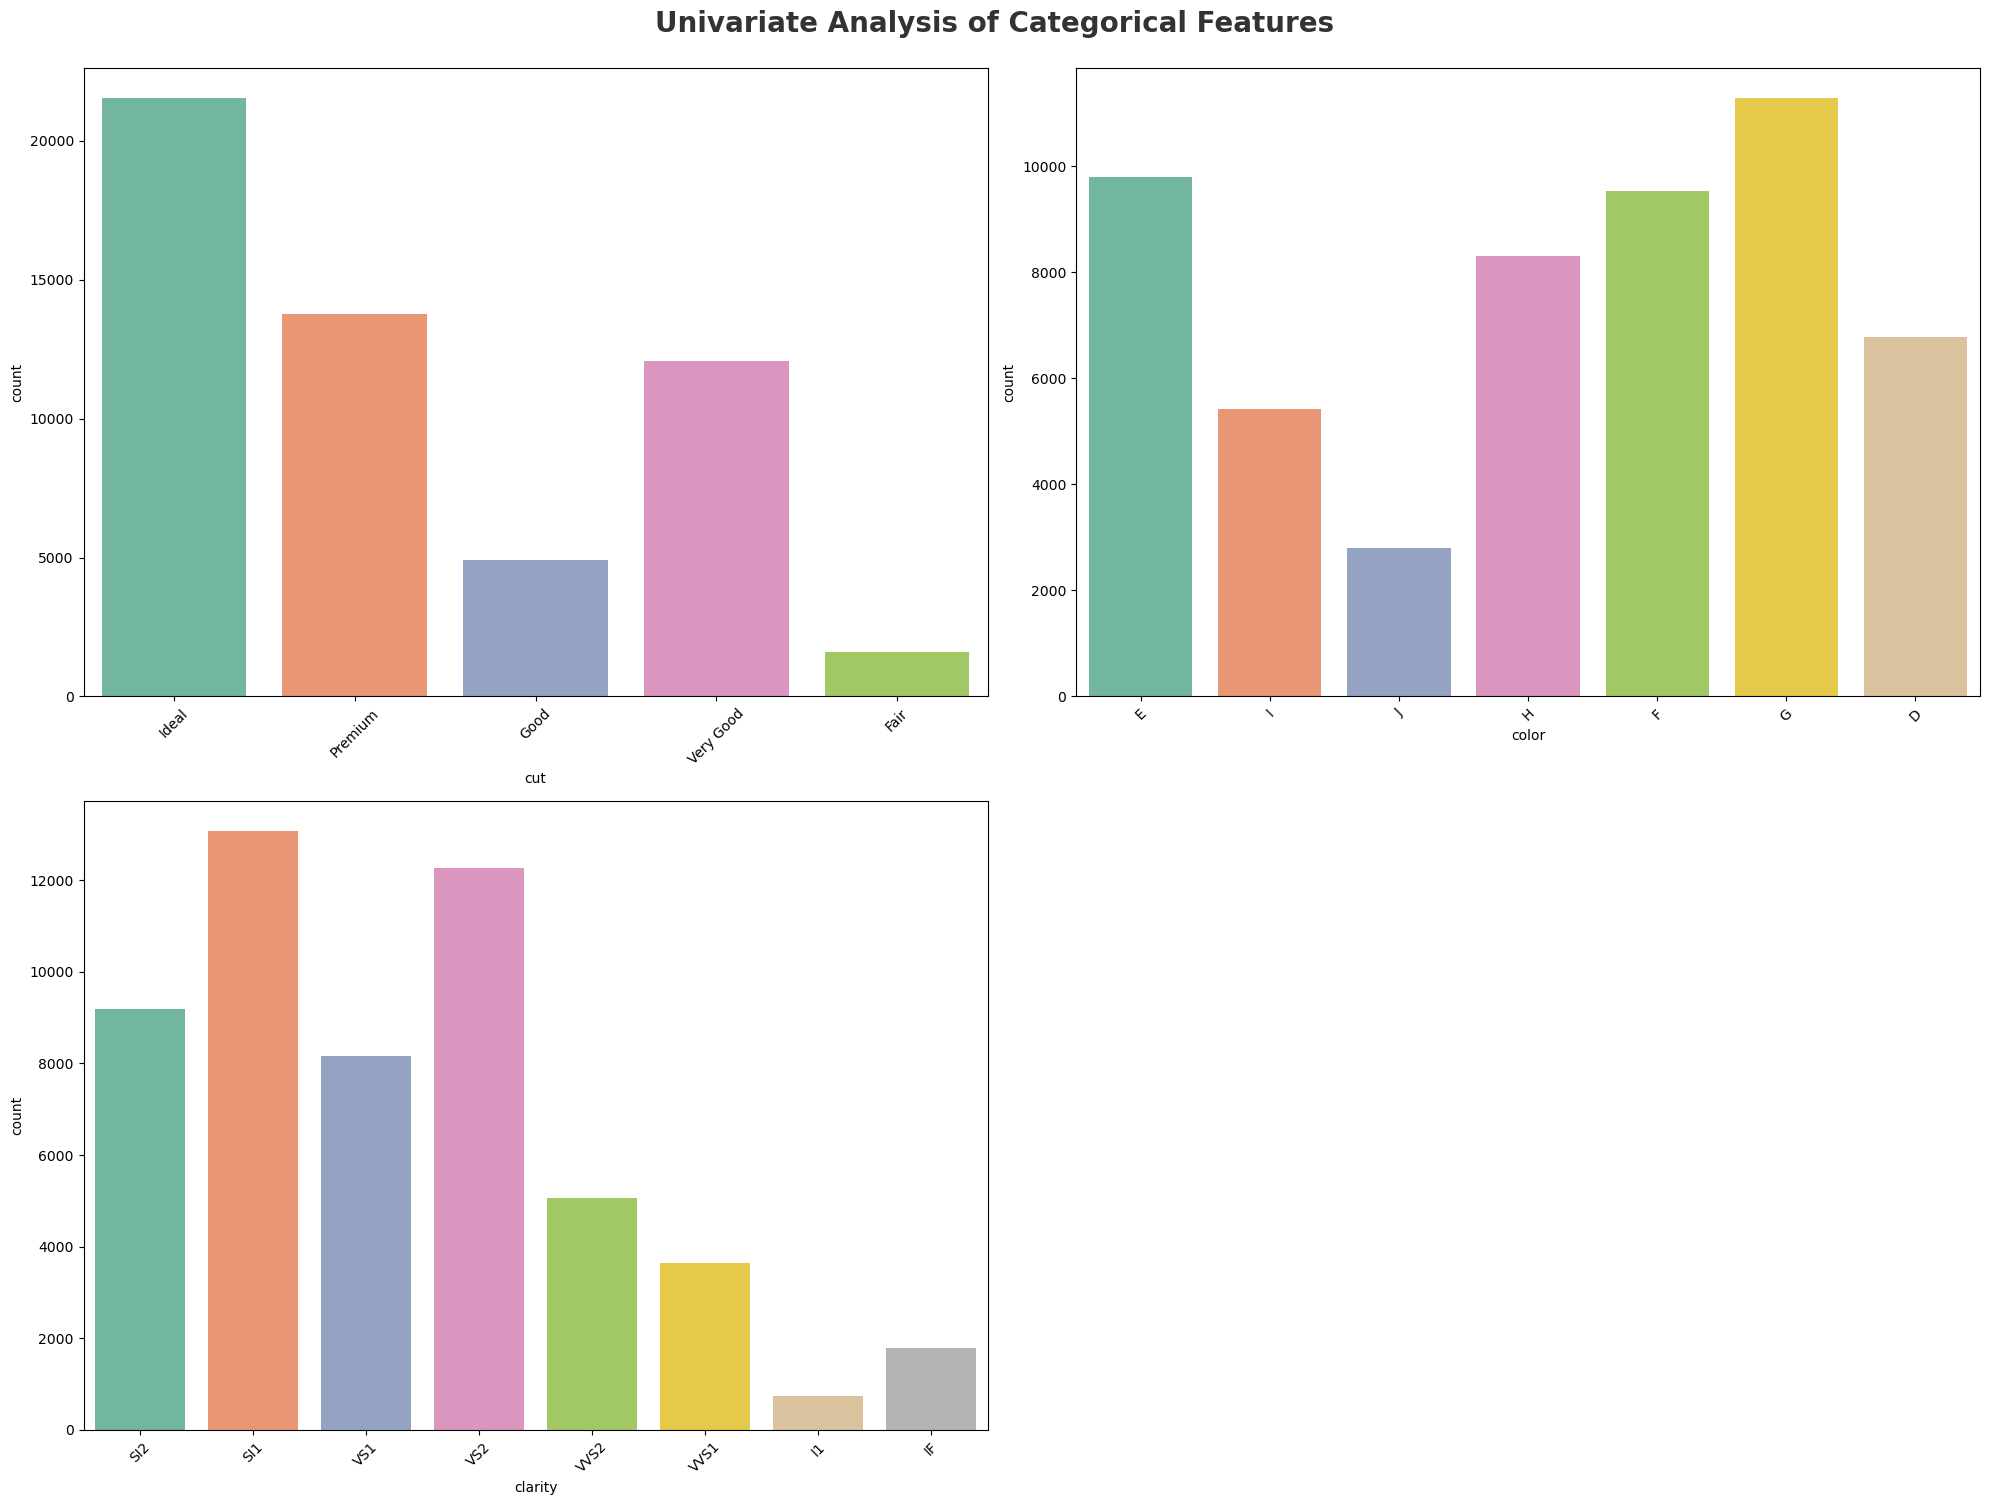

In [21]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = ['cut', 'color', 'clarity']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=diamond_copy[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

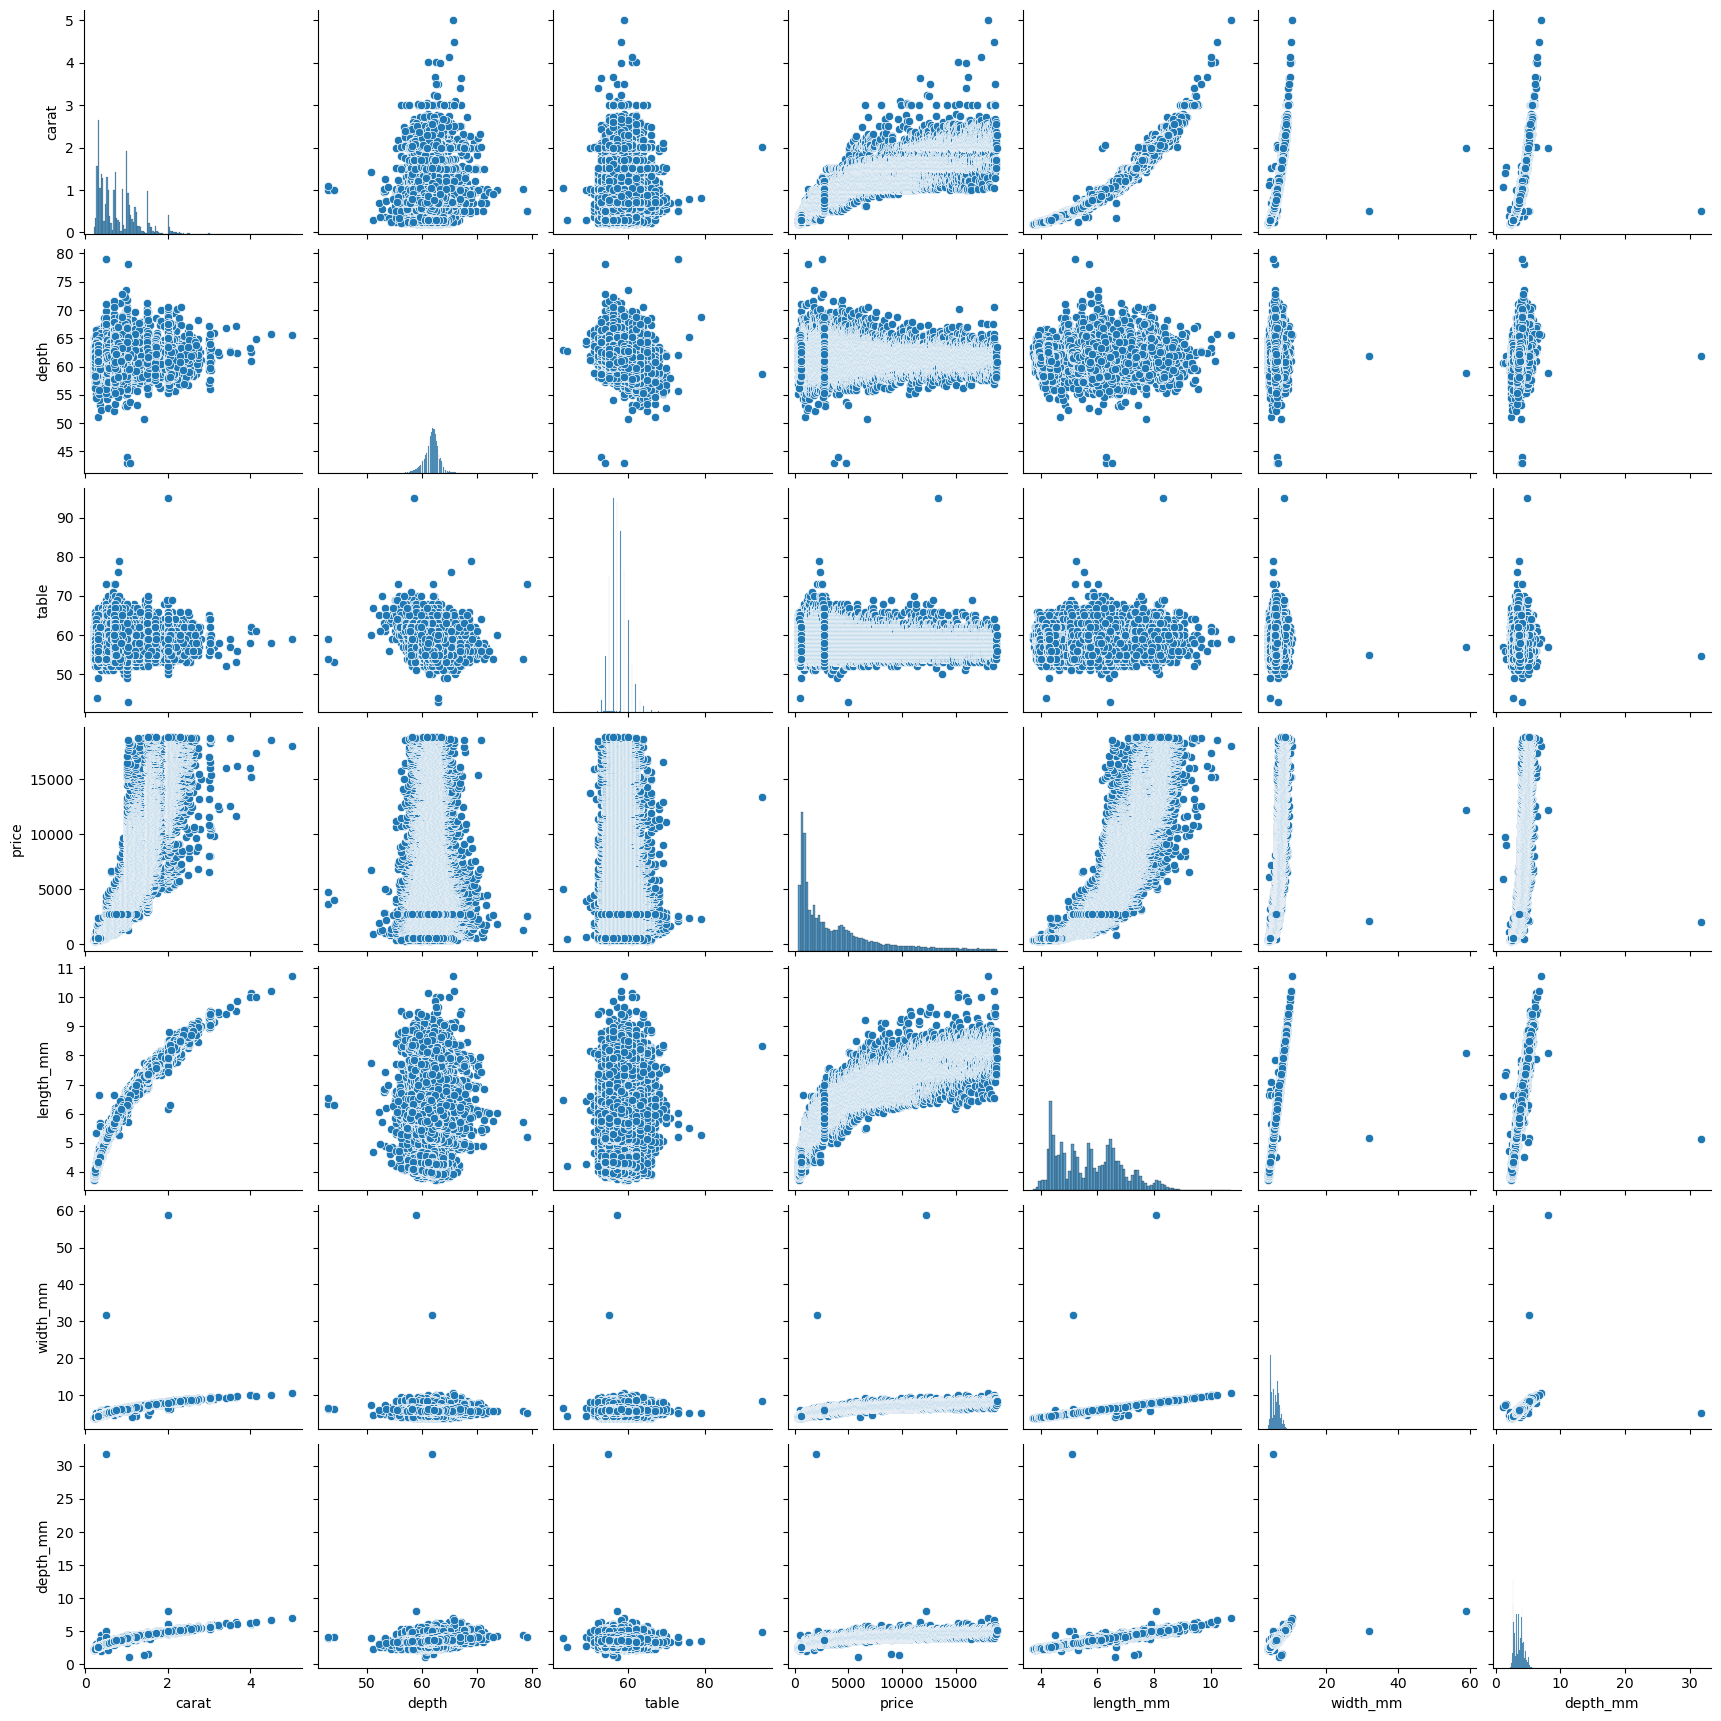

In [22]:
sns.pairplot(diamond_copy)

### Observations - 

- Price vs. Carat

The scatter plot of price versus carat shows a positive correlation. As the carat weight increases, the price of the diamond tends to increase as well.

- Price vs. Depth

The scatter plot of price versus depth does not show a clear correlation. The data points are scattered across the plot, suggesting that depth alone does not have a strong influence on the price of a diamond.

- Price vs. Table

Similar to depth, the scatter plot of price versus table does not reveal a clear correlation. The data points are scattered, indicating that the table percentage does not directly determine the price of a diamond.

- Price vs. dimensions

The scatter plots of price versus the dimensions show positive correlations. As the dimensions (length, width, and depth) of the diamond increase, the price tends to increase as well. This is likely because larger dimensions are associated with higher carat weights, which command higher prices.


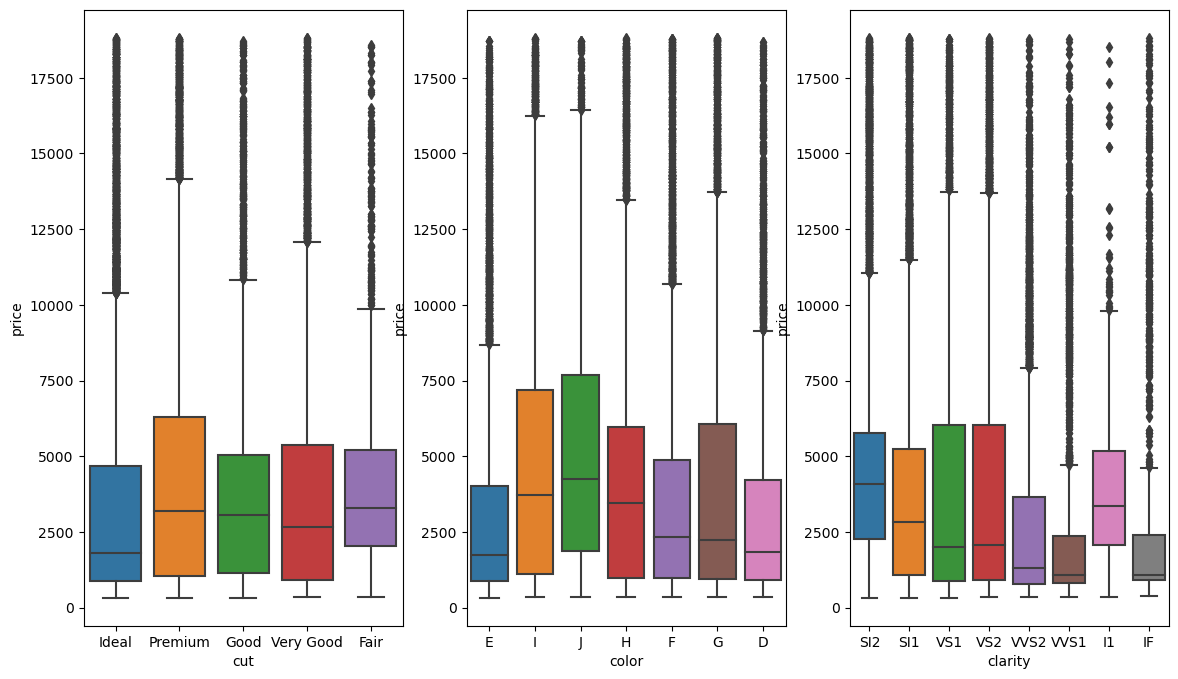

In [23]:
# comparison for categorical variable using box-plot

plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
sns.boxplot(x="cut", y="price", data=diamond_copy)

plt.subplot(1, 3, 2)
sns.boxplot(x="color", y="price", data=diamond_copy)

plt.subplot(1, 3, 3)
sns.boxplot(x="clarity", y="price", data=diamond_copy)

plt.show()

### Observations 

- Cut vs. Price

The "Ideal" cut has the highest median price, followed by "Premium", "Very Good", "Good", and "Fair" cuts, respectively. This suggests that better cut quality is associated with higher diamond prices.
The "Ideal" cut has a relatively narrow interquartile range (IQR), indicating a more concentrated distribution of prices around the median.
There are outliers in all cut categories, particularly in the higher price ranges, representing exceptional diamonds with unique characteristics.


-  Color vs. Price

The median price decreases as the color grade moves from D (colorless) to J (near-colorless yellow), indicating that colorless diamonds tend to be more expensive.
The IQR is relatively narrow for the D and E color grades, suggesting a more consistent pricing for these higher-quality colors.
The presence of outliers in all color grades indicates that other factors, such as cut, clarity, and carat weight, can also significantly influence the price.


- Clarity vs. Price

The median price decreases as the clarity grade moves from IF (Internally Flawless) to I1 (Included), indicating that diamonds with better clarity tend to be more expensive.
The IQR is relatively narrow for the higher clarity grades (IF, VVS1, VVS2, VS1, VS2), suggesting a more consistent pricing for these higher-quality clarities.
The presence of outliers in all clarity grades, particularly in the lower clarity categories, suggests that other factors, such as cut, color, and carat weight, can also significantly impact the price.

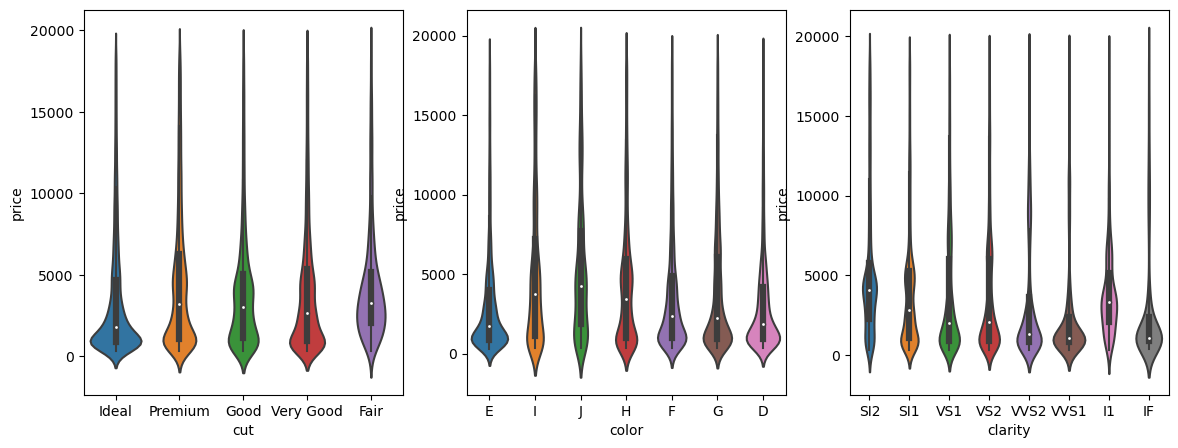

In [24]:
# comparison for categorical variable using violinplotabs

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.violinplot(x="cut", y="price", data=diamond_copy)

plt.subplot(1, 3, 2)
sns.violinplot(x="color", y="price", data=diamond_copy)

plt.subplot(1, 3, 3)
sns.violinplot(x="clarity", y="price", data=diamond_copy)

plt.show()

<AxesSubplot:xlabel='cut', ylabel='price'>

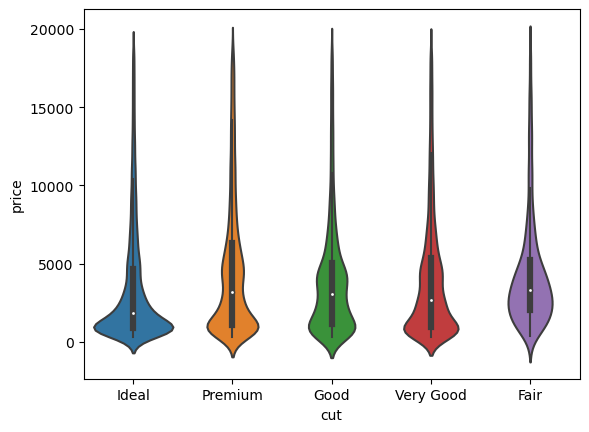

In [25]:
sns.violinplot(x="cut", y="price", data=diamond_copy)

<AxesSubplot:xlabel='color', ylabel='price'>

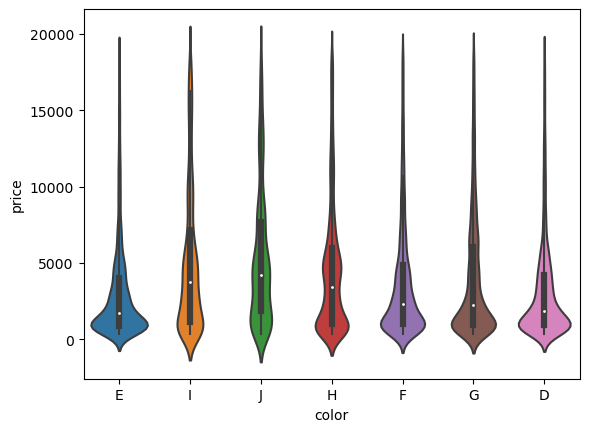

In [26]:
sns.violinplot(x="color", y="price", data=diamond_copy)

<AxesSubplot:xlabel='clarity', ylabel='price'>

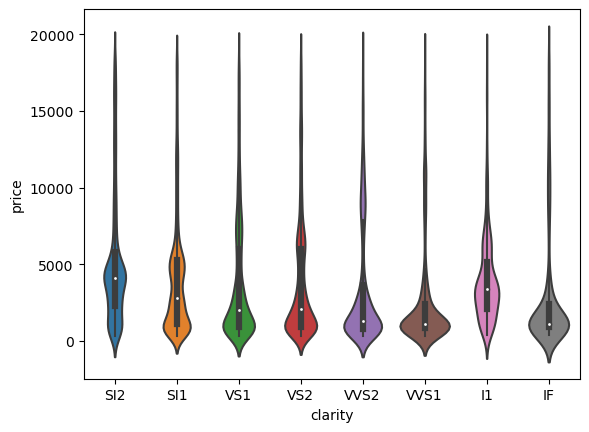

In [27]:
sns.violinplot(x="clarity", y="price", data=diamond_copy)

In [28]:
 Q1 = diamond_copy['carat'].quantile(0.25)
 Q3 = diamond_copy['carat'].quantile(0.75)
 IQR = Q3 - Q1

 lower_bound = Q1 - 1.5 * IQR
 upper_bound = Q3 + 1.5 * IQR

 outliers = diamond_copy[(diamond_copy['carat'] < lower_bound) | (diamond_copy['carat'] > upper_bound)]
 print(outliers)

       carat      cut color clarity  depth  table  price  length_mm  width_mm  \
12246   2.06  Premium     J      I1   61.2   58.0   5203       8.10      8.07   
13002   2.14     Fair     J      I1   69.4   57.0   5405       7.74      7.70   
13118   2.15     Fair     J      I1   65.5   57.0   5430       8.01      7.95   
13757   2.22     Fair     J      I1   66.7   56.0   5607       8.04      8.02   
13991   2.01     Fair     I      I1   67.4   58.0   5696       7.71      7.64   
...      ...      ...   ...     ...    ...    ...    ...        ...       ...   
27741   2.15    Ideal     G     SI2   62.6   54.0  18791       8.29      8.35   
27742   2.04  Premium     H     SI1   58.1   60.0  18795       8.37      8.28   
27744   2.29  Premium     I     SI1   61.8   59.0  18797       8.52      8.45   
27746   2.07    Ideal     G     SI2   62.5   55.0  18804       8.20      8.13   
27749   2.29  Premium     I     VS2   60.8   60.0  18823       8.50      8.47   

       depth_mm  
12246    

## Observation 

Outliers are data points that significantly deviate from the rest of the data. They can distort statistical measures like the mean and standard deviation, leading to misleading results. Data cleansing involves detecting outliers and deciding whether to remove them, cap them, or treat them as valid data points based on domain knowledge.

## Correlation Matrix

In [29]:
# Make copy to avoid changing original data 

label_data = diamond.copy()
object_cols = ['cut', 'clarity', 'color']

# Apply label encoder to each column with categorical data

label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


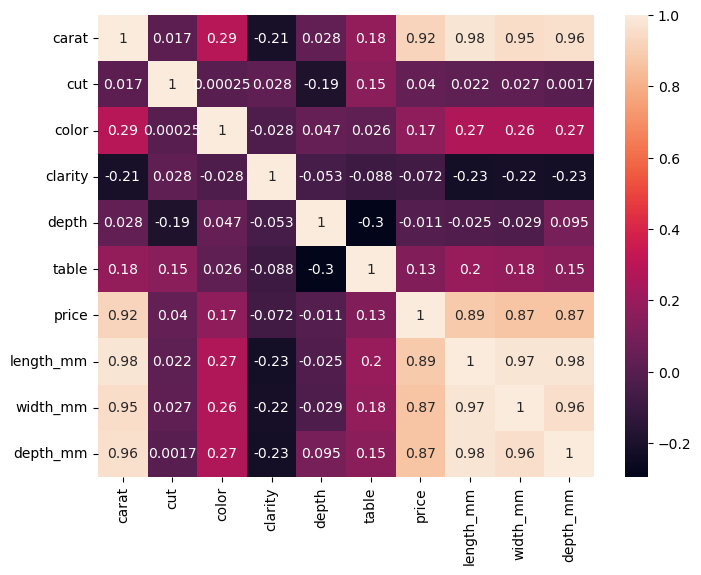

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(label_data.corr(),annot=True)
plt.show()

## Insights:

Diamond Dimensions show a high correlation to the target(price) column.
"depth", "cut" and "table" show low correlation. We could consider dropping but let's keep it.

<AxesSubplot:xlabel='price', ylabel='Density'>

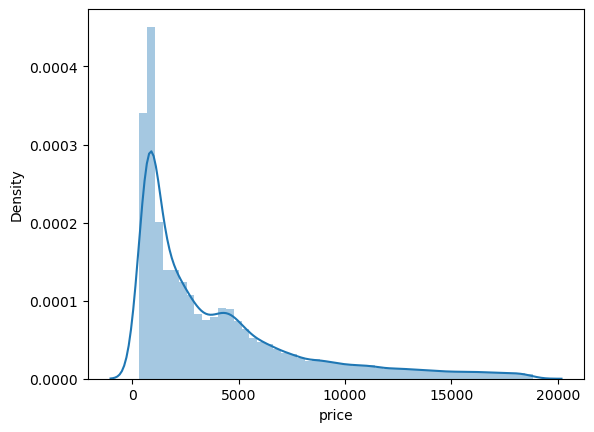

In [31]:
sns.distplot(label_data['price'])

## Insights

- The target variable price is left skewed so will have to do the log transformation to make it normal distribution.

<AxesSubplot:xlabel='price', ylabel='Density'>

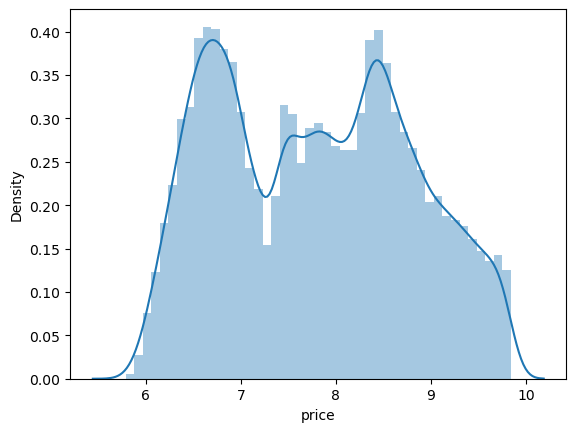

In [32]:
# Apply log transformation
sns.distplot(np.log(label_data['price']))

<AxesSubplot:xlabel='price', ylabel='Density'>

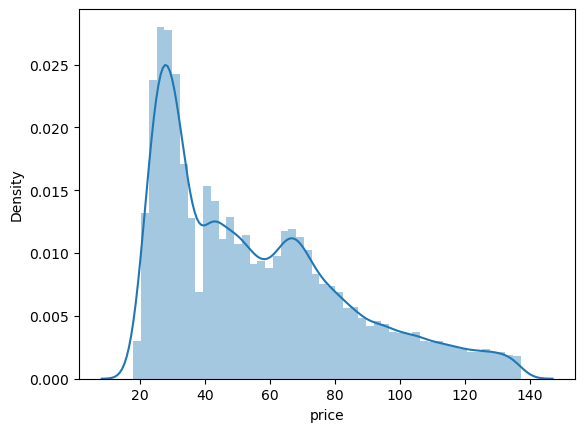

In [33]:
sns.distplot(np.sqrt(label_data['price']))

## Predictive Modelling

In [34]:
# libraries
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn import metrics

In [35]:
# Assigning the featurs as X and trarget as y

X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [36]:
X_train

,carat,cut,color,clarity,depth,table,length_mm,width_mm,depth_mm
19372,0.27,2,1,6,62.3,56.0,4.15,4.17,2.59
53321,0.71,4,0,2,63.2,56.0,5.69,5.73,3.61
47554,0.53,4,1,4,61.8,60.0,5.13,5.22,3.20
52695,0.70,2,1,5,61.9,57.0,5.69,5.74,3.54
9843,1.05,2,2,3,60.9,56.0,6.64,6.56,4.02
...,...,...,...,...,...,...,...,...,...
919,0.72,0,2,4,56.9,69.0,5.93,5.77,3.33
53479,0.71,2,5,5,62.2,55.0,5.71,5.73,3.56
38484,0.42,2,3,7,60.7,55.0,4.86,4.89,2.96
10747,1.00,1,2,2,63.4,61.0,6.29,6.35,4.01


In [37]:
y_train

19372     622
53321    2652
47554    1874
52695    2553
9843     4675
         ... 
919      2879
53479    2681
38484    1031
10747    4851
49708    2147
Name: price, Length: 40440, dtype: int64

In [38]:
# Building pipelins of standard scaler and model for random forest regressors, and linear regression


pipeline_linear_regression=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_random_forest=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


# List of all the pipelines
pipelines = [pipeline_linear_regression,pipeline_random_forest]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "RandomForest"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [39]:
## Cross valdation comparions for two models

cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1362.991893 
RandomForest: -550.958796 


In [40]:
# Model prediction on test data

y_pred_Random_forest = pipeline_random_forest.predict(X_test)
y_pred_Linear = pipeline_linear_regression.predict(X_test)

In [41]:
y_pred_Linear

array([3335.03388112, 6173.38377446, 2423.91873959, ...,  237.16257322,
       9821.42296742, 1068.83869592])

In [42]:
y_pred_Random_forest

array([2328.4 , 5668.63, 3795.21, ...,  514.74, 8893.35, 1068.53])

## Model Evaluation

In [43]:
# Model Evaluation for Linear Regression
print()
print("R^2:",metrics.r2_score(y_test, y_pred_Linear))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, y_pred_Linear))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_Linear))
print("MSE:",metrics.mean_squared_error(y_test, y_pred_Linear))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_Linear)))


R^2: 0.8875471978452594
Adjusted R^2: 0.8874720623427061
MAE: 858.2737356246703
MSE: 1789111.4113706215
RMSE: 1337.576693640638


In [44]:
# Model Evaluation for random forest regressor 
print("R^2:",metrics.r2_score(y_test, y_pred_Random_forest))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, y_pred_Random_forest))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_Random_forest))
print("MSE:",metrics.mean_squared_error(y_test, y_pred_Random_forest))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_Random_forest)))

R^2: 0.9804517859494515
Adjusted R^2: 0.9804387247819344
MAE: 269.5411434824078
MSE: 311009.8828984811
RMSE: 557.6826004982414


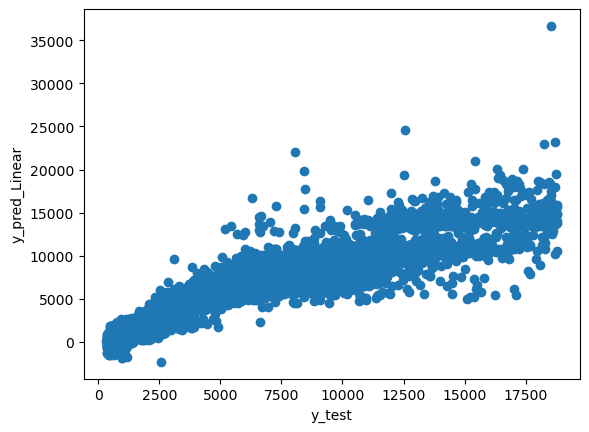

In [45]:
plt.scatter(y_test,y_pred_Linear)
plt.xlabel('y_test')
plt.ylabel('y_pred_Linear')
plt.savefig("my_scatter_plot.png")

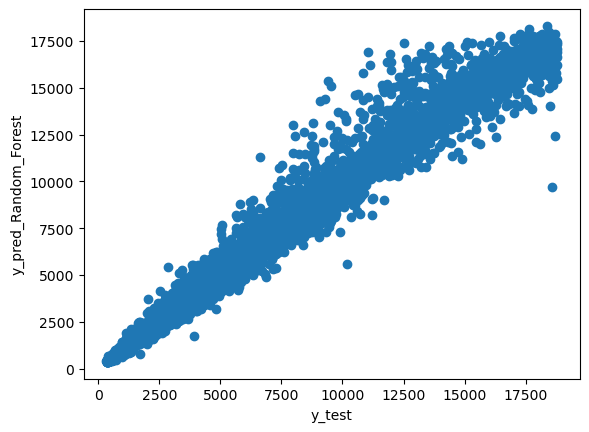

In [46]:
plt.scatter(y_test,y_pred_Random_forest)
plt.xlabel('y_test')
plt.ylabel('y_pred_Random_Forest')
plt.savefig("my_scatter_plot.png")

In [47]:
diamond_price_features = pd.DataFrame({
    'carat': [0.9],
    'cut': [2],
    'color': [5],
    'clarity': [4],
    'depth': [62.40],
    'table': [65.00],
    'length_mm': [3.95],
    'width_mm': [3.98],
    'depth_mm': [2.43]
})
diamond_price_features

,carat,cut,color,clarity,depth,table,length_mm,width_mm,depth_mm
0,0.9,2,5,4,62.4,65.0,3.95,3.98,2.43


In [52]:
diamond_price_prediction=pipe.predict(diamond_price_features)
print('A Predicted Diamond Price for one diamond is: ',diamond_price_prediction,"USD")

A Predicted Diamond Price for one diamond is:  [1189.68] USD


### Text Mining 

In [54]:
import spacy
import os 

In [55]:
nlp=spacy.load('en_core_web_sm')
nlp

In [56]:
file = "Text Mining.txt"
file_txt = open(file).read()
doc = nlp(file_txt)
doc

Understanding the Factors that Influence Diamond Pricing

Diamonds, often celebrated as symbols of beauty, love, and commitment, are also known for their hefty price tags. The price of a diamond is influenced by a myriad of factors, each contributing to its final market value. The most crucial of these is often encapsulated in the four Cs: Carat, Cut, Color, and Clarity. Beyond these, other elements such as certification, the diamond's shape, and market demand also play significant roles. This article will delve into each of these factors, providing insights into why diamonds are priced the way they are.

Carat Weight

The carat weight of a diamond is perhaps the most straightforward factor affecting its price. One carat is equivalent to 0.2 grams, and as the weight increases, so does the price, often exponentially. This price jump is due to the rarity of larger diamonds compared to smaller ones. However, two diamonds of the same weight can have very different prices based on other qua

In [57]:
from collections import Counter
words=[token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
word_counts=Counter(words)
word_counts

Counter({'understand': 2,
         'factor': 8,
         'Influence': 1,
         'Diamond': 3,
         'Pricing': 2,
         '\n\n': 14,
         'diamond': 29,
         'celebrate': 1,
         'symbol': 2,
         'beauty': 3,
         'love': 2,
         'commitment': 1,
         'know': 1,
         'hefty': 1,
         'price': 16,
         'tag': 1,
         'influence': 3,
         'myriad': 1,
         'contribute': 2,
         'final': 1,
         'market': 4,
         'value': 5,
         'crucial': 1,
         'encapsulate': 1,
         'cs': 2,
         'Carat': 2,
         'Cut': 2,
         'Color': 2,
         'Clarity': 3,
         'element': 3,
         'certification': 4,
         'shape': 3,
         'demand': 6,
         'play': 1,
         'significant': 3,
         'role': 1,
         'article': 1,
         'delve': 1,
         'provide': 2,
         'insight': 1,
         'way': 1,
         'Weight': 1,
         'carat': 2,
         'weight': 3,
         'stra

In [58]:
verbs=[token.lemma_ for token in doc if token.pos_=="VERB"]
verbs

['understand',
 'celebrate',
 'know',
 'influence',
 'contribute',
 'encapsulate',
 'play',
 'delve',
 'provide',
 'price',
 'affect',
 'do',
 'compare',
 'have',
 'base',
 'impact',
 'cut',
 'exhibit',
 'make',
 'affect',
 'reflect',
 'contribute',
 'grade',
 'command',
 'grade',
 'start',
 'move',
 'increase',
 'exhibit',
 'consider',
 'refer',
 'range',
 'include',
 'command',
 'affect',
 'produce',
 'provide',
 'increase',
 'base',
 'remain',
 'maintain',
 'carry',
 'fetch',
 'influence',
 'exhibit',
 'expose',
 'impact',
 'influence',
 'command',
 'perceive',
 'be',
 'grow',
 'pay',
 'source',
 'lead',
 'increase',
 'source',
 'clarityâ€”bee',
 'underestimate',
 'understand',
 'allow',
 'make',
 'inform',
 'ensure',
 'get',
 'buy',
 'serve',
 'navigate']

In [59]:
pronouns=[token.lemma_ for token in doc if token.pos_=="PROPN"]
pronouns

['Influence',
 'Diamond',
 'Pricing',
 'Carat',
 'Cut',
 'Color',
 'Clarity',
 'Carat',
 'Weight',
 'Cut',
 'Quality',
 'sparkle',
 'Excellent',
 'Poor',
 'Color',
 'Diamond',
 'D',
 'colorless',
 'Z',
 'Colorless',
 'Clarity',
 'Clarity',
 'Flawless',
 'Shape',
 'Certification',
 'Gemological',
 'Institute',
 'America',
 'GIA',
 'Market',
 'Demand',
 'Rarity',
 'Market',
 'Additional',
 'Diamond',
 'Pricing',
 'Fluorescence',
 'Brand',
 'Environmental',
 'Ethical',
 'Considerations']

In [60]:
noun=[token.lemma_ for token in doc if token.pos_=="NOUN"]
noun

['factor',
 'diamond',
 'symbol',
 'beauty',
 'love',
 'commitment',
 'price',
 'tag',
 'price',
 'diamond',
 'myriad',
 'factor',
 'market',
 'value',
 'element',
 'certification',
 'diamond',
 'shape',
 'market',
 'demand',
 'role',
 'article',
 'factor',
 'insight',
 'diamond',
 'way',
 'carat',
 'weight',
 'diamond',
 'factor',
 'price',
 'carat',
 'gram',
 'weight',
 'increase',
 'price',
 'price',
 'jump',
 'rarity',
 'diamond',
 'one',
 'diamond',
 'weight',
 'price',
 'quality',
 'aspect',
 'cut',
 'factor',
 'diamond',
 'beauty',
 'price',
 'diamond',
 'brilliance',
 'fire',
 'precision',
 'cut',
 'light',
 'diamond',
 'appearance',
 'cut',
 'diamond',
 'cut',
 'grade',
 'price',
 'color',
 'factor',
 'scale',
 'color',
 'diamond',
 'value',
 'diamond',
 'end',
 'scale',
 'hue',
 'color',
 'absence',
 'inclusion',
 'blemish',
 'diamond',
 'scale',
 'clarity',
 'grade',
 'inclusion',
 'blemish',
 '10x',
 'magnification',
 'inclusion',
 'blemish',
 '10x',
 'magnification',
 'cla

In [61]:
print("The Name entity recognition /n")
for entity in doc.ents:
    print(entity.text)

The Name entity recognition /n
four
Cs
Carat
carat
One
0.2 grams
two
Z
Flawless
under 10x
four
Cs
the Gemological Institute of America
GIA
Market Demand and Rarity

Market Demand: Demand
Environmental and Ethical Considerations
four


In [62]:
word_counts

Counter({'understand': 2,
         'factor': 8,
         'Influence': 1,
         'Diamond': 3,
         'Pricing': 2,
         '\n\n': 14,
         'diamond': 29,
         'celebrate': 1,
         'symbol': 2,
         'beauty': 3,
         'love': 2,
         'commitment': 1,
         'know': 1,
         'hefty': 1,
         'price': 16,
         'tag': 1,
         'influence': 3,
         'myriad': 1,
         'contribute': 2,
         'final': 1,
         'market': 4,
         'value': 5,
         'crucial': 1,
         'encapsulate': 1,
         'cs': 2,
         'Carat': 2,
         'Cut': 2,
         'Color': 2,
         'Clarity': 3,
         'element': 3,
         'certification': 4,
         'shape': 3,
         'demand': 6,
         'play': 1,
         'significant': 3,
         'role': 1,
         'article': 1,
         'delve': 1,
         'provide': 2,
         'insight': 1,
         'way': 1,
         'Weight': 1,
         'carat': 2,
         'weight': 3,
         'stra

In [63]:
word_counts.keys()

dict_keys(['understand', 'factor', 'Influence', 'Diamond', 'Pricing', '\n\n', 'diamond', 'celebrate', 'symbol', 'beauty', 'love', 'commitment', 'know', 'hefty', 'price', 'tag', 'influence', 'myriad', 'contribute', 'final', 'market', 'value', 'crucial', 'encapsulate', 'cs', 'Carat', 'Cut', 'Color', 'Clarity', 'element', 'certification', 'shape', 'demand', 'play', 'significant', 'role', 'article', 'delve', 'provide', 'insight', 'way', 'Weight', 'carat', 'weight', 'straightforward', 'affect', 'equivalent', '0.2', 'gram', 'increase', 'exponentially', 'jump', 'rarity', 'large', 'compare', 'small', 'one', 'different', 'base', 'quality', 'aspect', 'Quality', 'arguably', 'cut', 'significantly', 'impact', 'subsequently', 'exhibit', 'superior', 'brilliance', 'sparkle', 'fire', 'make', 'highly', 'desirable', 'expensive', 'precision', 'light', 'reflect', 'overall', 'appearance', 'grade', 'Excellent', 'Poor', 'high', 'command', 'color', 'critical', 'scale', 'start', 'D', 'colorless', 'move', 'Z', '

In [64]:
word_counts.values()

dict_values([2, 8, 1, 3, 2, 14, 29, 1, 2, 3, 2, 1, 1, 1, 16, 1, 3, 1, 2, 1, 4, 5, 1, 1, 2, 2, 2, 2, 3, 3, 4, 3, 6, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 3, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 6, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 4, 1, 1, 8, 3, 6, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [65]:
filtered_word_freq = {word_counts: count for word_counts, count in word_counts.items() if word_counts.strip()}

In [66]:
filtered_word_freq

{'understand': 2,
 'factor': 8,
 'Influence': 1,
 'Diamond': 3,
 'Pricing': 2,
 'diamond': 29,
 'celebrate': 1,
 'symbol': 2,
 'beauty': 3,
 'love': 2,
 'commitment': 1,
 'know': 1,
 'hefty': 1,
 'price': 16,
 'tag': 1,
 'influence': 3,
 'myriad': 1,
 'contribute': 2,
 'final': 1,
 'market': 4,
 'value': 5,
 'crucial': 1,
 'encapsulate': 1,
 'cs': 2,
 'Carat': 2,
 'Cut': 2,
 'Color': 2,
 'Clarity': 3,
 'element': 3,
 'certification': 4,
 'shape': 3,
 'demand': 6,
 'play': 1,
 'significant': 3,
 'role': 1,
 'article': 1,
 'delve': 1,
 'provide': 2,
 'insight': 1,
 'way': 1,
 'Weight': 1,
 'carat': 2,
 'weight': 3,
 'straightforward': 1,
 'affect': 3,
 'equivalent': 1,
 '0.2': 1,
 'gram': 1,
 'increase': 4,
 'exponentially': 1,
 'jump': 1,
 'rarity': 3,
 'large': 1,
 'compare': 1,
 'small': 1,
 'one': 1,
 'different': 1,
 'base': 2,
 'quality': 4,
 'aspect': 1,
 'Quality': 1,
 'arguably': 1,
 'cut': 6,
 'significantly': 1,
 'impact': 2,
 'subsequently': 1,
 'exhibit': 3,
 'superior': 1,


In [67]:
filtered_word_counter = Counter(filtered_word_freq)
filtered_word_counter

Counter({'understand': 2,
         'factor': 8,
         'Influence': 1,
         'Diamond': 3,
         'Pricing': 2,
         'diamond': 29,
         'celebrate': 1,
         'symbol': 2,
         'beauty': 3,
         'love': 2,
         'commitment': 1,
         'know': 1,
         'hefty': 1,
         'price': 16,
         'tag': 1,
         'influence': 3,
         'myriad': 1,
         'contribute': 2,
         'final': 1,
         'market': 4,
         'value': 5,
         'crucial': 1,
         'encapsulate': 1,
         'cs': 2,
         'Carat': 2,
         'Cut': 2,
         'Color': 2,
         'Clarity': 3,
         'element': 3,
         'certification': 4,
         'shape': 3,
         'demand': 6,
         'play': 1,
         'significant': 3,
         'role': 1,
         'article': 1,
         'delve': 1,
         'provide': 2,
         'insight': 1,
         'way': 1,
         'Weight': 1,
         'carat': 2,
         'weight': 3,
         'straightforward': 1,
    

In [68]:
# Get the top 10 most frequent words
top_10_words = filtered_word_counter.most_common(10)
top_10_words

[('diamond', 29),
 ('price', 16),
 ('factor', 8),
 ('high', 8),
 ('demand', 6),
 ('cut', 6),
 ('color', 6),
 ('value', 5),
 ('market', 4),
 ('certification', 4)]

In [69]:
# Split the words and their counts for plotting
words, counts = zip(*top_10_words)

In [70]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'lime', 'brown']

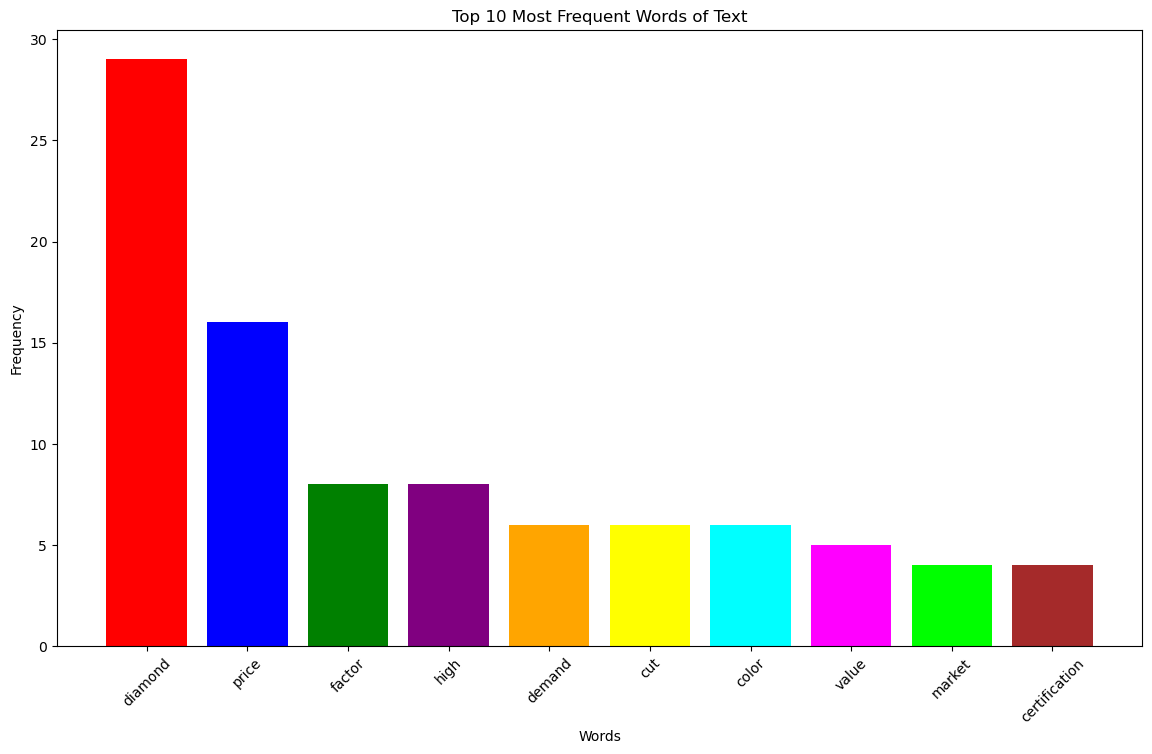

In [71]:
# Plotting the bar chart
plt.figure(figsize=(14, 8))
plt.bar(words, counts, color = colors[:len(words)])
plt.title('Top 10 Most Frequent Words of Text')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [72]:
from wordcloud import WordCloud

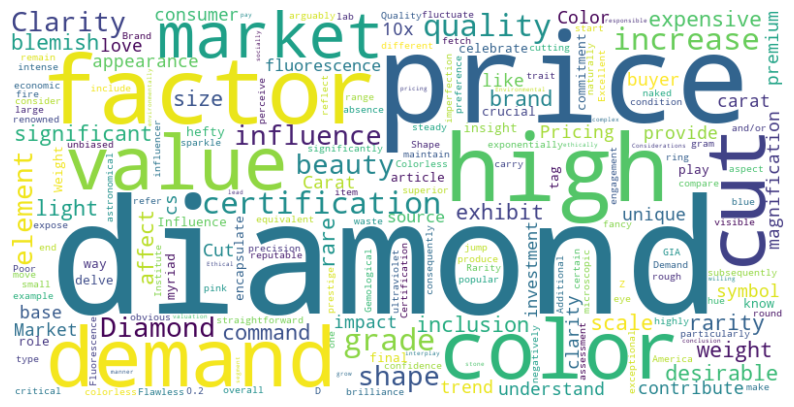

In [73]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()